In [1]:
from pyNIT import NIT
import pdb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.interpolate import CubicSpline

from few.create_waveform import CreateWaveform

In [45]:
M = 1e6
mu = 1e1
p0 = 13.0
e0 = 0.4


err_arr = np.logspace(-14, -10, 20)
err_arr[0] = 1e-16

out_list = []
ts = []
for err in err_arr:
    t, p, e, Phi_phi, Phi_r = NIT(M, mu, p0, e0, err=err)
    out_list.append([t, p, e, Phi_phi, Phi_r])
    print(len(t), t.max())
    ts.append(t.max())
min_t_max = np.min(ts)

319 49094798.78280599
61 48189801.184873275
56 48564916.944925904
48 48610369.22265197
46 48134406.18981987
43 48046125.95744538
39 48372020.21469652
38 48534638.630917706
35 48509164.87321344
33 48623347.44369213
31 48786474.05513841
29 47210639.362585634
26 48328476.129120365
25 48742258.26584736
24 48462847.63014884
23 47980084.27525665
20 44970560.38409297
20 46978442.59524462
19 45988284.53163479
18 45856195.57380264


## $\Phi_\phi$ Mismatch

0.0
2.559600087437275e-09
2.150585709514985e-09
8.01983990328381e-09
1.6045496598060538e-08
1.668952243072397e-08
4.632620775879559e-08
1.0092927726912393e-07
7.978620675253012e-08
1.3709263180228248e-07
3.882066533789086e-07
4.974760730025451e-07
9.054446913348002e-07
1.6212842727236776e-06
3.38665893273582e-06
3.2673433117968997e-06
5.0552622385624524e-05
1.4540388616368638e-05
1.8361622694973434e-05
8.615081542218128e-05


Text(0.5, 0, 'Err Setting for Integrator')

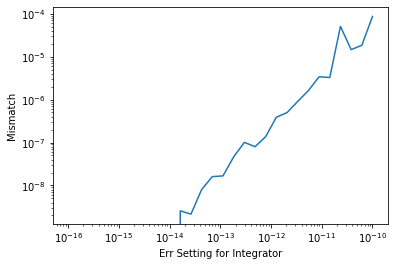

In [46]:
plt.close()
dt = 10.0
new_t = np.arange(0.0, min_t_max+dt, dt)
mismatch_list = []
for i, (t, p, e, Phi_phi, Phi_r) in enumerate(out_list):
    spl = CubicSpline(t, Phi_phi)
    new_Phi_phi = spl(new_t)
    
    if i == 0:
        control = new_Phi_phi
    
    comp = np.dot(np.exp(1j*control).conj(), np.exp(1j*new_Phi_phi))
    norm1 = np.dot(np.exp(1j*control).conj(), np.exp(1j*control))
    norm2 = np.dot(np.exp(1j*new_Phi_phi).conj(), np.exp(1j*new_Phi_phi))
    mismatch = comp/np.sqrt(norm1*norm2)
    print(1 - mismatch.real)
    mismatch_list.append(mismatch)

ax = plt.gca()
mismatch_list = np.asarray(mismatch_list)
ax.loglog(err_arr, 1-mismatch_list.real)
ax.set_ylabel('Mismatch')
ax.set_xlabel('Err Setting for Integrator')

## $\Phi_r$ Mismatch

0.0
3.8023084680816055e-10
3.074311916151373e-10
1.1098939545206576e-09
2.371714935556213e-09
2.4183366420515995e-09
6.824228293567103e-09
1.4636169054504933e-08
1.180398789824011e-08
1.9899814573953734e-08
5.7489768279239684e-08
7.33932149499239e-08
1.2914063607372128e-07
2.2857670856080148e-07
4.993247698648062e-07
4.7277023940139884e-07
7.295589675382352e-06
2.0535541682686898e-06
2.3711635079859406e-06
1.1831595523870142e-05


Text(0.5, 0, 'Err Setting for Integrator')

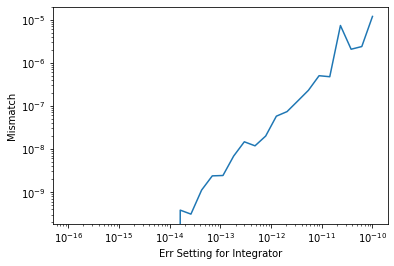

In [47]:
plt.close()
dt = 10.0
new_t = np.arange(0.0, min_t_max+dt, dt)
mismatch_list = []
for i, (t, p, e, Phi_r, Phi_r) in enumerate(out_list):
    spl = CubicSpline(t, Phi_r)
    new_Phi_r = spl(new_t)
    
    if i == 0:
        control = new_Phi_r
    
    comp = np.dot(np.exp(1j*control).conj(), np.exp(1j*new_Phi_r))
    norm1 = np.dot(np.exp(1j*control).conj(), np.exp(1j*control))
    norm2 = np.dot(np.exp(1j*new_Phi_r).conj(), np.exp(1j*new_Phi_r))
    mismatch = comp/np.sqrt(norm1*norm2)
    print(1 - mismatch.real)
    mismatch_list.append(mismatch)

ax = plt.gca()
mismatch_list = np.asarray(mismatch_list)
ax.loglog(err_arr, 1-mismatch_list.real)
ax.set_ylabel('Mismatch')
ax.set_xlabel('Err Setting for Integrator')

# Running Waveforms

In [2]:
nn_kwargs = dict(input_str="SE_n30", folder="few/files/weights/", activation_kwargs={})

kwargs = dict(transform_file="few/files/reduced_basis_n30.dat", nn_kwargs=nn_kwargs)

batch_size = kwargs["batch_size"] = 1000

### setting up mode info

In [55]:
l = np.zeros(3294, dtype=int)
m = np.zeros(3294, dtype=int)
n = np.zeros(3294, dtype=int)

ind = 0
mode_inds = {}
total_n = 41
for l_i in range(2, 10 + 1):
    for m_i in range(1, l_i + 1):
        ind_start = ind
        num_n_here = 0
        for n_i in range(-20, 20 + 1):
            l[ind] = l_i
            m[ind] = m_i
            n[ind] = n_i

            mode_inds[(l_i, m_i, n_i)] = ind
            mode_inds[(l_i, -m_i, n_i)] = ind_start + total_n - 1 - num_n_here

            ind += 1
            num_n_here += 1

            
kwargs["mode_inds"] = mode_inds

### Instantiate Waveform Creator

In [5]:
cw = CreateWaveform(**kwargs)

Number of layers: 13


### Set Parameters

In [24]:
theta = np.pi / 2
phi = np.pi / 3
M = 1e5
mu = 1e1
dt = 10.0
p = 12.5
e = 0.4

# use this for inputing you own trajectory, in wich case you need to add trajectory for p and e. 
Phi_phi = None
Phi_r = None
nit_err = 1e-10
spline_modes = True

### Run

In [25]:
out1 = cw(
    M,
    mu,
    p,
    e,
    l,
    m,
    n,
    theta,
    phi,
    dt,
    Phi_phi=Phi_phi,
    Phi_r=Phi_r,
    nit_err=nit_err,
    spline_modes=spline_modes,
    get_modes=None,
)

Raise the batch size. Only running first 1000 points.
interpolated modes: init shape (88,)


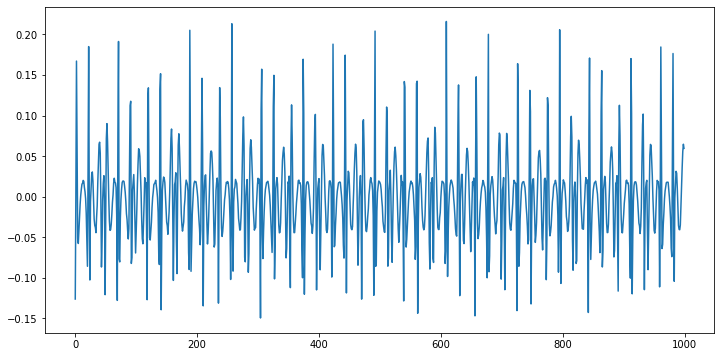

In [26]:
fig = plt.figure()
fig.set_size_inches(12, 6)
plt.plot(out1.real)

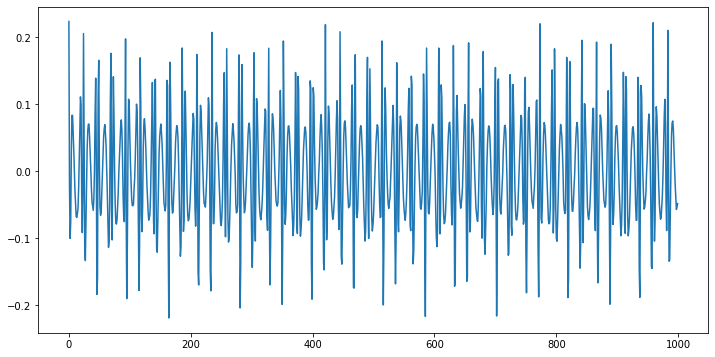

In [27]:
fig = plt.figure()
fig.set_size_inches(12, 6)
plt.plot(out1.imag)

## Run at high degree of accuracy for trajectory and do not spline modes (use NN directly for all)

In [28]:
out2 = cw(
    M,
    mu,
    p,
    e,
    l,
    m,
    n,
    theta,
    phi,
    dt,
    Phi_phi=Phi_phi,
    Phi_r=Phi_r,
    nit_err=nit_err*1e-3,
    spline_modes=False,
    get_modes=None,
)

Raise the batch size. Only running first 1000 points.
direct solve: init shape (1000,)


Mismatch: 2.8620716907568067e-10


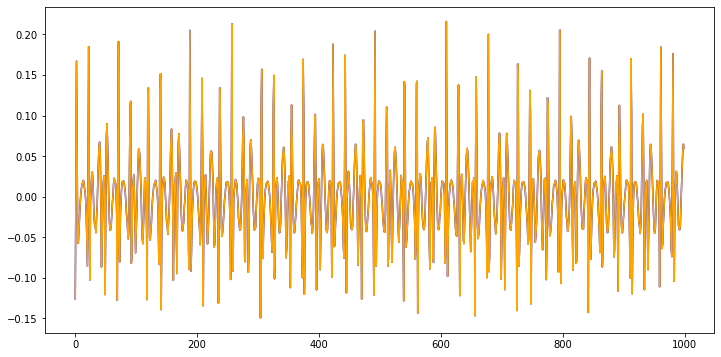

In [67]:
fig = plt.figure()
fig.set_size_inches(12, 6)
plt.plot(out1.real, color='blue')
plt.plot(out2.real, color='orange')

fd_out1_real = np.fft.rfft(out1.real)
fd_out2_real = np.fft.rfft(out2.real)

autocorr = np.dot(fd_out1_real.conj(), fd_out2_real).real/np.sqrt(np.dot(fd_out1_real.conj(), fd_out1_real).real*np.dot(fd_out2_real.conj(), fd_out2_real).real)

print('Mismatch:', 1- autocorr)

## Same thing but longer

In [17]:
batch_size = kwargs["batch_size"] = 100000
cw_longer = CreateWaveform(**kwargs)

Number of layers: 13


In [32]:
out1_long = cw_longer(
    M,
    mu,
    p,
    e,
    l,
    m,
    n,
    theta,
    phi,
    dt,
    Phi_phi=Phi_phi,
    Phi_r=Phi_r,
    nit_err=nit_err,
    spline_modes=True,
    get_modes=None,
)

Raise the batch size. Only running first 100000 points.
interpolated modes: init shape (88,)


In [31]:
out2_long = cw_longer(
    M,
    mu,
    p,
    e,
    l,
    m,
    n,
    theta,
    phi,
    dt,
    Phi_phi=Phi_phi,
    Phi_r=Phi_r,
    nit_err=nit_err*1e-3,
    spline_modes=False,
    get_modes=None,
)

Raise the batch size. Only running first 100000 points.
direct solve: init shape (100000,)


Mismatch: 1.827921014552203e-06


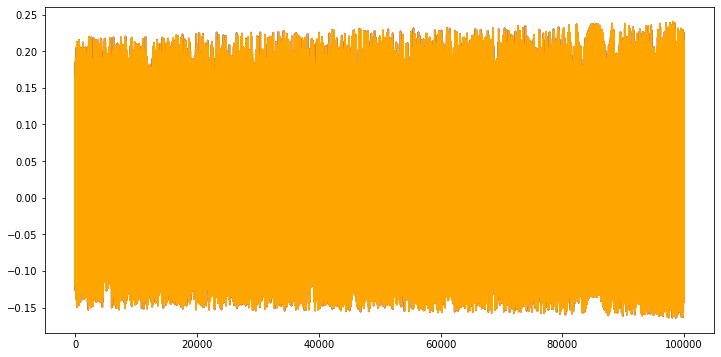

In [65]:
fig = plt.figure()
fig.set_size_inches(12, 6)
plt.plot(out1_long.real, color='blue')
plt.plot(out2_long.real, color='orange')

fd_out1_real = np.fft.rfft(out1_long.real)
fd_out2_real = np.fft.rfft(out2_long.real)

autocorr = np.dot(fd_out1_real.conj(), fd_out2_real).real/np.sqrt(np.dot(fd_out1_real.conj(), fd_out1_real).real*np.dot(fd_out2_real.conj(), fd_out2_real).real)

print('Mismatch:', 1- autocorr)

Mismatch: 1.2852532880192058e-06


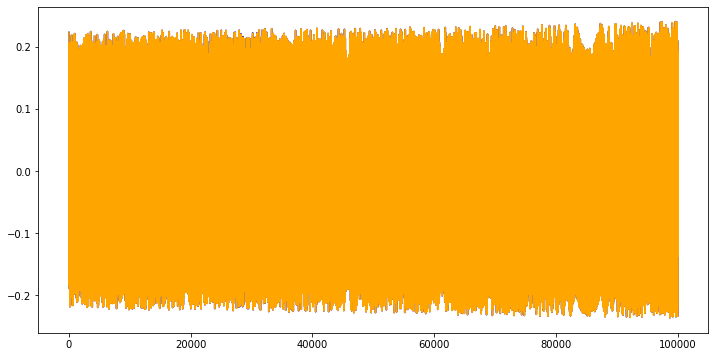

In [66]:
fig = plt.figure()
fig.set_size_inches(12, 6)

plt.plot(out1_long.imag, color='blue')
plt.plot(out2_long.imag, color='orange')

fd_out1_imag = np.fft.rfft(out1_long.imag)
fd_out2_imag = np.fft.rfft(out2_long.imag)

autocorr = np.dot(fd_out1_imag.conj(), fd_out2_imag).real/np.sqrt(np.dot(fd_out1_imag.conj(), fd_out1_imag).real*np.dot(fd_out2_imag.conj(), fd_out2_imag).real)

print('Mismatch:', 1- autocorr)

## Examine specific modes

In [48]:
get_modes = [(2, 2, 0), (7, -4, 8)]

In [49]:
out_modes = cw(
    M,
    mu,
    p,
    e,
    l,
    m,
    n,
    theta,
    phi,
    dt,
    Phi_phi=Phi_phi,
    Phi_r=Phi_r,
    nit_err=nit_err,
    spline_modes=True,
    get_modes=get_modes,
)

Raise the batch size. Only running first 1000 points.
interpolated modes: init shape (88,)


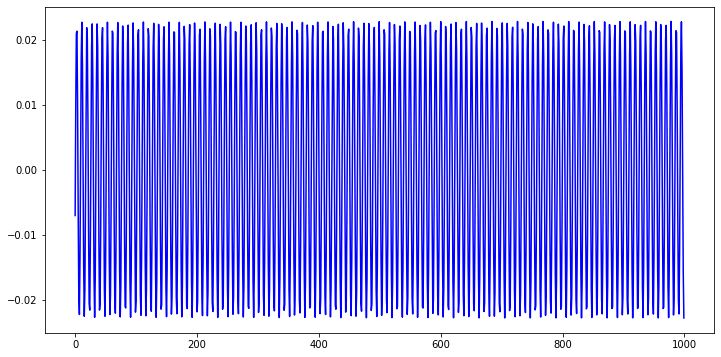

In [50]:
fig = plt.figure()
fig.set_size_inches(12, 6)
plt.plot(out_modes[(2, 2, 0)].real, color='blue')

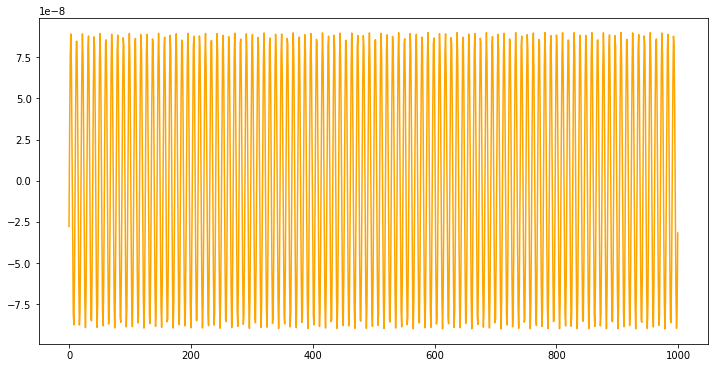

In [51]:
fig = plt.figure()
fig.set_size_inches(12, 6)
plt.plot(out_modes[(7, -4, 8)].real, color='orange')

### We could use the following to check l,m modes with sum of n

In [58]:
get_modes = []
l_here = 2
for m_here in range(-2, 2+1):
    if m_here == 0:
        continue
    for n_here in range(-20, 20+1):
        get_modes.append((l_here, m_here, n_here))

In [59]:
out_modes = cw(
    M,
    mu,
    p,
    e,
    l,
    m,
    n,
    theta,
    phi,
    dt,
    Phi_phi=Phi_phi,
    Phi_r=Phi_r,
    nit_err=nit_err,
    spline_modes=True,
    get_modes=get_modes,
)

Raise the batch size. Only running first 1000 points.
interpolated modes: init shape (88,)


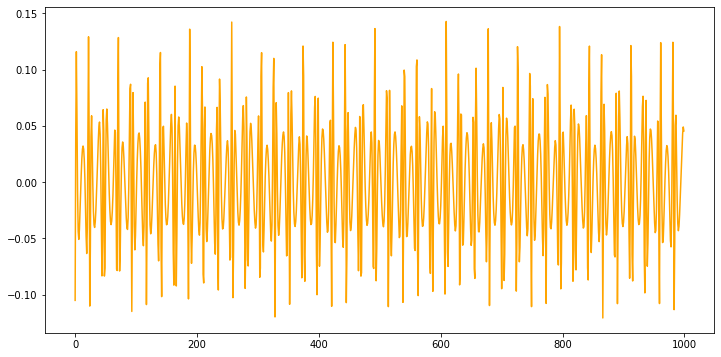

In [62]:
check = np.sum([out_modes[mode] for mode in get_modes], axis=0)

fig = plt.figure()
fig.set_size_inches(12, 6)
plt.plot(check.real, color='orange')